In [1]:
from compare_to_user import generate_recommendation
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('program_list.pkl', 'rb') as file:
    program_list = pickle.load(file)

Create list of artificially generated answers from ChatGPT

In [3]:
octavia_spencer_answers = [
    "I’m proudest of the fact that I didn’t give up. This industry can be tough—life can be even tougher—but I stayed the course, trusted God, and trusted myself. I’m proud that I’ve been able to tell stories that matter, stories that shine a light on the overlooked and the underestimated. And I’m proud that I can be a source of encouragement to anyone who’s ever felt unseen.",
    
    "Integrity, empathy, and faith. I try to approach everything I do with a heart of compassion and a sense of responsibility. I ask myself: Is this true to who I am? Will it help somebody? Will I be proud of this later? If the answer is yes, I step forward with confidence.",
    
    "I admire people who are kind even when no one’s watching. People who listen more than they talk, and who act with grace under pressure. I admire quiet strength. The kind that doesn’t have to prove itself—it just shows up, does the work, and uplifts everyone in the room.",
    
    "To love, to serve, and to grow. I believe we’re all here to make this world a little brighter for each other. Life isn’t about perfection—it’s about progress. About showing up with your whole heart, learning from your mistakes, and doing what you can to leave a positive mark.",
    
    "I remember sitting around the table with my family, eating, laughing, telling stories, and just feeling that warmth. We didn’t have everything, but we had each other—and that was enough. That sense of belonging, of being seen and loved, is something I carry with me always.",
    
    "With humility. Growth requires you to admit you don’t know everything—and that’s okay. I read, I listen, I surround myself with people who challenge and support me. I take time to reflect. And I remind myself that becoming your best self isn’t a destination—it’s a lifelong journey.",
    
    "Happiness, to me, is peace. It’s being able to look in the mirror and feel proud of who you are—not just what you’ve done. It’s laughter with friends, a quiet moment in the middle of chaos, or using your voice to uplift someone else. It’s knowing that you’re aligned with your purpose.",
    
    "Life has taught me that your worth isn’t defined by anyone else’s opinion. That setbacks can be setups for something greater. That kindness isn’t weakness. That standing in your truth may not always be easy, but it’s always worth it. And above all, that we’re not here to compete—we’re here to connect."
]
octavia_spencer_qs = [0,1,2,3,4,5,6,7]

russell_nelson_answers = [
    "I am proudest of my family and the eternal principles we have strived to live by together. In my work as a heart surgeon, I saw the miracles of the human body. But the most fulfilling moments have come from helping others find spiritual healing through the teachings of the Savior.",
    "I am guided by faith in Jesus Christ, love for God and for all of His children, and a deep commitment to truth. I seek inspiration through prayer, and I strive to act with compassion, integrity, and humility in every decision.",
    "I greatly admire those who are quietly faithful—those who serve without expecting praise, who endure trials with grace, and who strengthen others through kindness, patience, and unwavering testimony.",
    "The purpose of life is to find joy through our relationship with God, to follow the example of Jesus Christ, and to prepare ourselves to return to live with our Heavenly Father. It is also to help others along that same path.",
    "I recall the simple joys of home—being with loved ones, learning to work hard, and developing faith from a young age. Those early moments planted seeds that have grown throughout my life.",
    "I approach growth through study, reflection, and prayer. I ask the Lord for guidance daily and strive to learn from both challenges and blessings. I also listen to others—learning never stops, regardless of your age or position.",
    "Happiness is knowing who you are, whose you are, and where you are going. It comes from living with purpose, loving others, and aligning your will with God’s.",
    "Life has taught me that peace comes through obedience, that love is the greatest power on Earth, and that God’s timing is always perfect—even when we don’t understand it right away."
]
russell_nelson_qs = [0,1,2,3,4,5,6,7]

alex_hirsch_answers = [
    "I’m proudest of creating Gravity Falls—a show where weirdness was a strength, mysteries mattered, and characters could be both ridiculous and deeply real. I wanted to make something that felt like a puzzle and a hug at the same time. Seeing how it impacted fans still blows my mind.",
    "Creativity, curiosity, and a refusal to underestimate kids. I believe in telling the truth in a funhouse mirror—using humor and heart to explore big ideas. Also, never trust a one-eyed triangle, but always trust your instincts.",
    "I admire people who stay weird without apology. People who are brilliant but still grounded. Who use their talent not just to entertain, but to challenge the system a little. And who aren’t afraid to make something personal, even when it’s risky.",
    "To explore, connect, and question. Life is this strange, hilarious, sometimes heartbreaking adventure—so we might as well treat it like one. I think we’re here to care deeply, dream wildly, and maybe leave behind something that makes people feel a little less alone.",
    "Making stop-motion horror films in my backyard using action figures and way too much ketchup. Or drawing comics in class and hoping the teacher wouldn’t notice. That spark of mischief + creativity still makes me grin.",
    "By trying not to take myself too seriously. Growth is weird, awkward, and often hilarious. But I think if you’re not cringing at who you used to be, you’re not evolving. I stay curious, challenge my comfort zone, and try to create from a place of honesty—even if it’s strange.",
    "Happiness is laughing so hard you snort. It’s solving a mystery. It’s sharing a weird idea and having someone say, 'Me too.' It’s the creative chaos, the unexpected kindness, the moments when something clicks and you realize, 'Oh—that’s why I’m here.'",
    "That nothing is too strange to matter. That vulnerability is strength. That good stories can change people. And that the best way to fight darkness is with light—and maybe a joke about wombats."
]
alex_hirsch_qs = [0,1,2,3,4,5,6,7]

pope_francis_answers = [
    "I am most proud of moments when I have been able to bring hope or peace to someone in suffering. Titles and honors fade—but compassion, that lasts. Being a servant to the people of God is my greatest blessing.",
    "Love, humility, mercy, and justice. I strive to follow the teachings of Christ, to care for the poor, the forgotten, and the earth. My decisions must always center on love—real, actionable love.",
    "I deeply admire those who dedicate their lives to others—the poor, the sick, the lonely. Saints in everyday clothing. I admire those who forgive when it’s hardest and love when it’s least deserved.",
    "The purpose of life is to love. To love God and to love your neighbor. All else follows. We are here to live in community, to care for one another, and to journey toward peace and unity.",
    "I remember the warmth of my family, the joy of simple things, and the beginning of my vocation. Childhood is the soil where faith and kindness can be planted and nurtured. Those early moments still live in my heart.",
    "With prayer, humility, and listening. I ask for God’s guidance and stay close to the Gospels. Growth is not only knowledge—it is becoming more loving, more forgiving, and more courageous in service.",
    "True happiness comes from knowing you are loved by God and extending that love to others. It is found in peace, simplicity, and generosity. Not in things, but in relationships.",
    "Life has taught me that we must not be afraid to change, to ask for forgiveness, or to start again. That power is found in kindness, and that the greatest gift we can offer each other is mercy."
]
pope_francis_qs = [0,1,2,3,4,5,6,7]

bill_nye_answers = [
    "I’m proudest of inspiring people—especially kids—to get excited about science. Whether it was through a bow tie, a goofy experiment, or a telescope pointed at Saturn, helping others connect with science is what lights me up.",
    "Evidence, curiosity, and critical thinking. I believe we should always question, explore, and adjust our course based on what we learn. Science gives us the tools to understand and improve the world—and that’s a responsibility we can’t take lightly.",
    "I admire people who fight for truth. People who listen to facts, who stand up for science in a world full of noise, and who work tirelessly to make life better for others. Especially the ones who don’t give up, even when it’s hard.",
    "To learn, to explore, and to leave the planet better than we found it. We’re here to marvel at the universe—and to do something meaningful with the tiny fraction of time we’re given in it.",
    "Tinkering with a sundial in my backyard and realizing I could track time with shadows. That blew my mind. It was my first taste of science as something magical—and that sense of wonder never left.",
    "I try to learn something new every day. Whether it’s reading, experimenting, or listening to someone with a different perspective, growth is about keeping your brain in motion. Like a bicycle—it only works if you keep moving.",
    "Happiness is understanding how things work—and then using that knowledge to make life better. It’s curiosity, community, and contributing to the greater good. Oh, and a well-timed pun doesn’t hurt.",
    "That the world is knowable. That science matters. That we have to take care of this planet—it’s the only one we’ve got. And that it’s never too late to be a little more curious and a lot more kind."
]

bill_nye_qs = [0,1,2,3,4,5,6,7]

dwayne_johnson_answers = [
    "I’m proudest of my journey—from being broke with $7 in my pocket, to where I am now. But more than the success, I’m proud that I never lost my gratitude or my hustle. And that I can use my platform to inspire others to keep pushing.",
    "Hard work, respect, and being real. I value discipline and heart. Every decision I make comes from a place of legacy—how does this impact my family, my fans, and the people watching me?",
    "I admire folks who stay grounded. Who succeed and still show love. I admire resilience—people who’ve been through the fire and still show up, stronger and kinder. Also, my mom—strongest person I know.",
    "To become your best self and lift others up along the way. Life is about growth, service, and knowing when to laugh—even at yourself. We’re here to leave things better than we found them.",
    "Wrestling with my dad as a kid and thinking I was winning. Spoiler: I wasn’t. But the fun, the laughter—that stuck with me. That kind of joy reminds me of what’s really important.",
    "Every day I hit the gym—it’s not just for strength, it’s therapy. Personal growth is about discipline, mindset, and constantly learning. I listen, reflect, and evolve—just like in the ring or on a film set.",
    "Happiness is health, family, purpose, and a killer cheat meal. It’s waking up excited to work. It’s knowing you’ve got people who love you and being able to give that love back.",
    "Life’s taught me to be grateful, stay humble, and never take anything for granted. That setbacks are setups. That your story isn’t over when you fall—it’s when you get back up. And that success without soul isn’t really success at all."
]
dwayne_johnson_qs = [0,1,2,3,4,5,6,7]

jk_rowling_answers = [
    "I’m proudest of finishing Harry Potter—not just because of what it became, but because I finished it when no one believed in it. Or in me. I’m proud of surviving depression, rejection, and doubt—and of using my voice to tell stories that helped others find courage.",
    "Empathy, justice, and the belief that words have power. I try to make decisions based on conscience, not convenience. If something is right, I do it—even if it’s terrifying. Especially if it’s terrifying.",
    "I admire people who stand up when it would be easier to stay quiet. Who defend the vulnerable. Who are brave, not in grand gestures, but in daily acts of kindness and clarity. And those who never stop learning.",
    "To love and be loved. To grow, change, and leave something meaningful behind. Life is a story—and our choices are the plot twists. The purpose is to make that story one worth telling.",
    "Reading under the covers with a flashlight. Creating imaginary worlds with my sister. Losing myself in books and finding myself there too. Those were the seeds of everything I write now.",
    "By reading, listening, and being willing to confront my blind spots. Growth often begins in discomfort. I try to be honest with myself, to ask hard questions, and to write my way toward understanding.",
    "It’s found in the quiet, often overlooked things: a cup of tea, a friend’s laugh, finishing a sentence that was hard to write. Happiness isn’t a constant—it’s moments of light in the dark.",
    "That failure is essential. That fear can be a guide. That magic is real—just not in the way I thought. And that compassion, far more than cleverness, is what changes the world."
]
jk_rowling_qs = [0,1,2,3,4,5,6,7]

taylor_swift_answers = [
    "I’m proudest of being able to grow with my fans—sharing my heartbreaks, my hopes, my stories, and watching them become part of other people’s lives. And reclaiming my voice in the industry? That too.",
    "Authenticity, resilience, and storytelling. I believe in owning your narrative, even when it's messy. I let my heart guide me, but I also trust my gut—and my cats.",
    "I admire people who turn pain into art. Who speak up even when it’s hard. Who reinvent themselves but stay true to their core. Like, if you can cry in the shower and then headline a tour, I see you.",
    "To connect. To create. To feel everything deeply and use that to lift others. Whether it's through a song, a friendship, or a look across the room—life is about making it meaningful.",
    "Dancing around in my room to Shania Twain, writing lyrics in my notebook, and feeling like someday, somehow, people might sing them with me. That spark of belief still makes me smile.",
    "Personal growth is like rewriting a bridge in a song—sometimes it takes heartbreak, sometimes it takes bravery. I journal, I reflect, I evolve. And then I write about it all.",
    "Happiness is being seen for who you really are and still being loved. It’s laughter with friends, creating something you're proud of, and being free to grow without limits.",
    "That you can’t please everyone, and that’s okay. That the high road gets lonely, but it’s still worth taking. And that healing isn’t linear—but it’s possible, and beautiful."
]
taylor_swift_qs = [0,1,2,3,4,5,6,7]

donovan_mitchell_answers = [
    "I’m proudest of the work I’ve done on and off the court. Winning games is great, but impacting communities, being a role model, and showing up for people—that’s what I want my legacy to be.",
    "Integrity, dedication, and respect. I make decisions with my team, my family, and my community in mind. I know kids are watching, and I want to set the right example.",
    "I admire leaders who don’t just talk—but act. People who put in the work, stay humble, and use their platforms to uplift others. My mom taught me a lot about that kind of strength.",
    "To grow, to contribute, and to make an impact. Life is about pushing your limits and bringing people along with you. Whether it’s hoops or helping others—you gotta leave a mark.",
    "Playing basketball with my friends until it was too dark to see the hoop. Just joy, competition, and love for the game. That memory reminds me where it all started.",
    "I study the game, study myself, and keep evolving. It’s about watching tape, listening to mentors, and staying hungry. Growth means being open—to coaching, to failure, to getting better every day.",
    "Happiness is feeling like you’re doing what you were born to do. It’s family, it’s fans, it’s giving back, and knowing you didn’t just play—you made a difference.",
    "Life’s taught me that hard work beats talent when talent doesn’t work hard. That success is sweeter when you bring others with you. And that your platform is only as strong as your purpose."
]
donovan_mitchell_qs = [0,1,2,3,4,5,6,7]

josh_johnson_answers = [
    "Honestly, I’m proudest of making people laugh during hard times. Whether it’s on stage, in a sketch, or through a joke that hits just right, knowing I made someone’s day better? That’s the real win.",
    "Empathy, honesty, and absurdity. I try to approach everything with a mix of truth and comedy. If something’s real, I’m gonna say it—but I’ll probably say it in a way that makes you snort-laugh.",
    "I admire people who are unapologetically themselves—especially when the world’s trying to box them in. Also, people who can make fun of themselves but still drop truth bombs. That combo’s powerful.",
    "To connect and to question. Life’s weird and wild, and we’re all trying to make sense of it. If I can make you laugh while we figure it out together—that’s the point.",
    "Trying to explain something ridiculous to an adult who clearly didn’t get it. Like, 'Why can’t I eat ice cream for breakfast?' That kind of logic-defying debate still cracks me up.",
    "I treat growth like a new joke—try it, bomb it, tweak it, try again. You gotta be okay with failing if you want to level up. And I journal a lot… mostly nonsense, but occasionally profound.",
    "Happiness is laughing with people who get your weird. It’s freedom, creativity, and the feeling of 'this might not be perfect, but it’s mine.'",
    "Life’s taught me that timing is everything—whether it’s a punchline or a pivot. That being vulnerable can be hilarious. And that sometimes the best way to heal is to laugh first, cry later."
]
josh_johnson_qs = [0,1,2,3,4,5,6,7]

harrison_ford_answers = [
    "I’m proudest of sticking it out. It wasn’t overnight, and it wasn’t easy. I built decks, I swung hammers, I got turned down a hundred times. But I kept at it. Persistence made everything else possible.",
    "Authenticity, humility, and a strong work ethic. I believe in showing up, doing the job well, and not making a big fuss about it. Let your work speak louder than your words.",
    "I admire people who are quietly brave. Not the loud, flashy types—the ones who just do the right thing because it’s the right thing. I admire craftsmanship, grit, and a good sense of humor.",
    "Purpose isn’t something handed to you—it’s something you build. Life’s about contributing, being useful, and leaving things a little better than you found them. And maybe having some fun along the way.",
    "Building treehouses with my friends and getting into harmless trouble. There’s a certain freedom and creativity kids have that we lose if we’re not careful. I try to hold onto that sense of play.",
    "I approach growth by learning through experience. You mess up, you fix it. You listen more than you talk. You try to be better today than you were yesterday—and you don’t make excuses.",
    "Happiness is peace of mind. Doing good work, being with people you love, finding small joys. It’s not about chasing a feeling—it’s about appreciating what you’ve already got.",
    "Life’s taught me that success is about endurance. That ego is useless. And that if you’re lucky enough to do what you love, you’d better not take it for granted."
]
harrison_ford_qs = [0,1,2,3,4,5,6,7]

In [3]:
Qs = ["proudest of", "core values", "qualities admired", "purpose of life", "childhood memory", "growth and dev", "happiness", "life lessons"]

In [5]:
GPT_test_answers = [octavia_spencer_answers,russell_nelson_answers,alex_hirsch_answers,pope_francis_answers,bill_nye_answers,
                    dwayne_johnson_answers, jk_rowling_answers, taylor_swift_answers,donovan_mitchell_answers,
                    josh_johnson_answers,harrison_ford_answers]
GPT_test_qs = [octavia_spencer_qs,russell_nelson_qs,alex_hirsch_qs,pope_francis_qs,bill_nye_qs,
                    dwayne_johnson_qs, jk_rowling_qs, taylor_swift_qs,donovan_mitchell_qs,
                    josh_johnson_qs,harrison_ford_qs]

Generate rankings and summaries for each set of synthetic answers

In [4]:
my_sample_answers = ["I believe we are here to learn and grow, to learn how to better love others and ourselves.", "Growth is really important to me, I try to make decisions that lead me closer to who I want to be as a person.","I do my best to be patient with myself, to keep trying even when I fall short."]
my_sample_qs = [0,1,2]

In [7]:
summaries = []
rankings = []
Nusers = len(GPT_test_answers)
NQs = len(Qs)
Nprogs = len(program_list)
for i in range(len(GPT_test_answers)):
    summ, ranking = generate_recommendation(GPT_test_answers[i],GPT_test_qs[i])
    summaries.append(summ)
    rankings.append(ranking)

1745875110.7808704
1745875128.1161659
1745875130.0510178
1745875139.0573454
1745875142.8265486
1745875157.2532394
1745875160.1440206
1745875171.9800687
1745875174.814441
1745875184.818504
1745875188.4565794
1745875202.134694
1745875205.0786421
1745875217.6090262
1745875220.2250621
1745875229.8957143
1745875232.335937
1745875242.6082704
1745875245.468495
1745875258.1959836
1745875260.9005125
1745875274.3206208


In [9]:
top3s = []
for r in rankings:
    top3s.append(r[:3])

[array([3, 2, 6]), array([2, 3, 5]), array([3, 2, 6]), array([3, 2, 4]), array([5, 2, 1]), array([5, 6, 2]), array([3, 2, 4]), array([3, 2, 6]), array([2, 6, 1]), array([3, 6, 2]), array([6, 2, 4])]


In [31]:
top3s_concatenated = np.concatenate(top3s)
counts = np.zeros(len(program_list))
programs = []
for i in range(len(program_list)):
    counts[i] = np.sum(top3s_concatenated==i)
    programs.append(program_list[i].name)
df_counts = pd.DataFrame({
    "Program": programs,
    "Counts": counts
})

Text(0.5, 1.0, 'Program Recommendation Frequency')

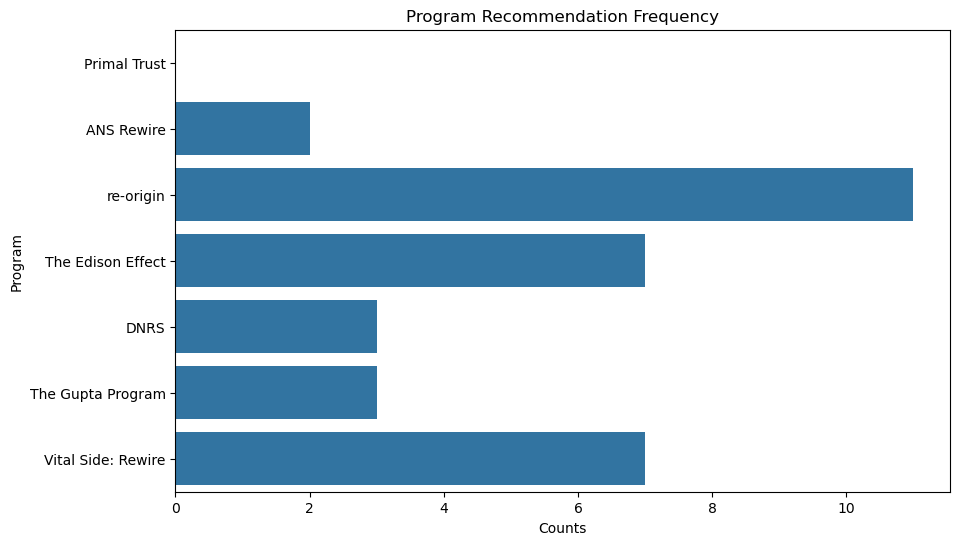

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Counts', y='Program', data=df_counts)
plt.title('Program Recommendation Frequency')


In [151]:
qs = np.concatenate(np.concatenate([p['Semantic Questions'] for p in summaries[:]])) #needed to concatenate twice
qscount = np.zeros(len(Qs)) #count how many times each question resulted in an answer that was used
for i in range(len(Qs)):
    qscount[i] = np.sum(qs == i)
df_qs_count = pd.DataFrame({
    "Questions": Qs,
    "Frequency of a Top 10 Match": qscount
})

Text(0.5, 1.0, 'Questions, Frequency of Semantic Matching to Program Sentences')

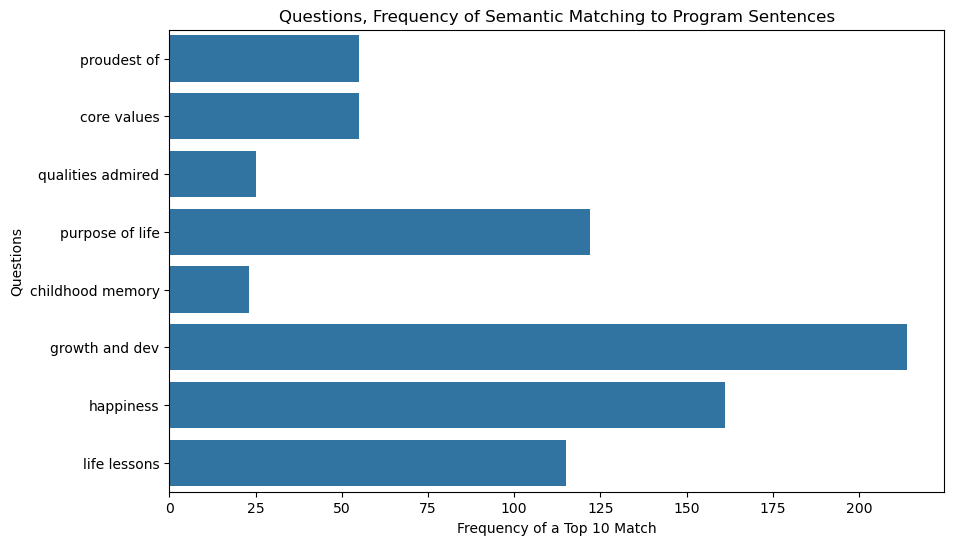

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of a Top 10 Match', y='Questions', data=df_qs_count)
plt.title('Questions, Frequency of Semantic Matching to Program Sentences')

In [159]:
qs_tone = np.concatenate(np.concatenate([p['Tone Questions'] for p in summaries[:]])) #needed to concatenate twice
qscount_tone = np.zeros(len(Qs)) #count how many times each question resulted in an answer that was used
for i in range(len(Qs)):
    qscount_tone[i] = np.sum(qs_tone == i)
df_qs_count_tone = pd.DataFrame({
    "Questions": Qs,
    "Frequency of a Top 10 Match": qscount_tone
})

Text(0.5, 1.0, 'Questions, Frequency of Tone Matching to Program Sentences')

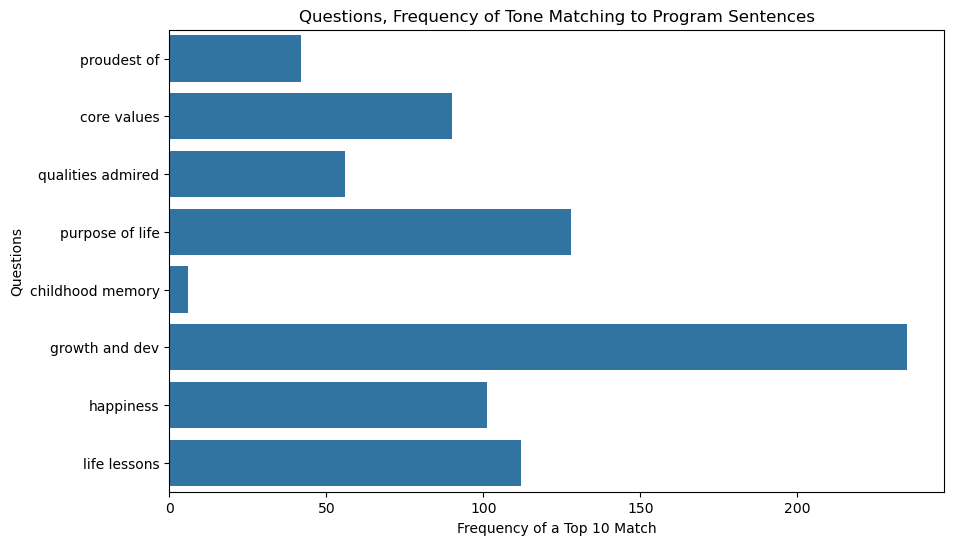

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of a Top 10 Match', y='Questions', data=df_qs_count_tone)
plt.title('Questions, Frequency of Tone Matching to Program Sentences')

In [143]:
Nusers = len(GPT_test_answers)
NQs = len(Qs)
Nprogs = len(program_list)
program_qs = np.zeros((Nprogs,NQs))
qs_prog = np.array([p['Semantic Questions'] for p in summaries[:]]) #This is a Nuser x Nprogs x Nsimilarities array of all the question indexes
for p in range(Nprogs):
    for s in range(Nusers):
        for q in range(NQs):
            program_qs[p,q] = program_qs[p,q]+np.sum(qs_prog[s][p] == q)

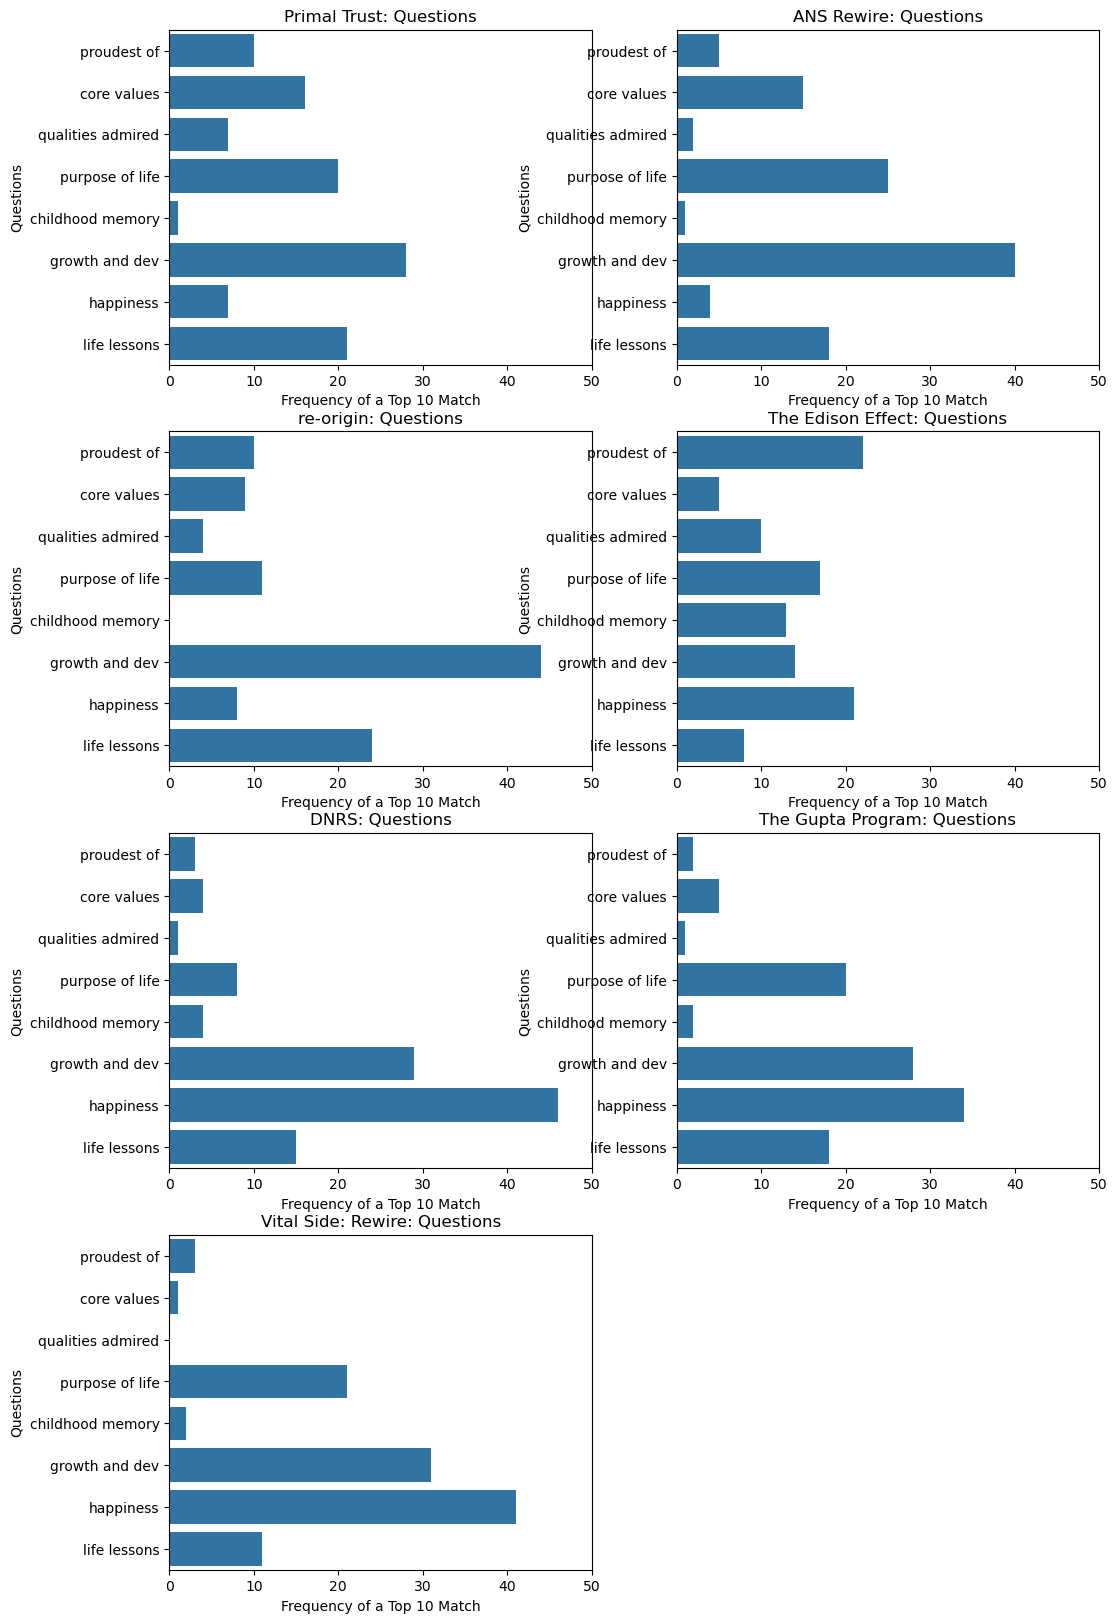

In [147]:
plt.figure(figsize = (12,20))
for p in range(Nprogs):
    plt.subplot(4,2,p+1)
    df_qs_by_prog = pd.DataFrame({
        "Questions": Qs,
        "Frequency of a Top 10 Match": program_qs[p,:]
    })
    sns.barplot(x="Frequency of a Top 10 Match", y='Questions', data=df_qs_by_prog)
    plt.xlim([0,50])
    plt.title(f"{program_list[p].name}: Questions")

In [103]:
print([p['Semantic Questions'] for p in summaries[:]])

[[[5, 7, 0, 5, 3, 7, 4, 1, 0, 3], [5, 6, 3, 6, 3, 1, 6, 5, 5, 0], [5, 6, 5, 5, 1, 0, 3, 5, 5, 2], [6, 6, 7, 6, 0, 0, 5, 4, 3, 4], [6, 5, 7, 1, 5, 5, 6, 3, 0, 6], [5, 1, 5, 6, 6, 5, 5, 1, 6, 6], [5, 6, 5, 5, 6, 5, 4, 5, 6, 6]], [[1, 1, 5, 3, 5, 5, 7, 5, 6, 5], [3, 0, 3, 3, 3, 3, 5, 5, 5, 1], [0, 0, 5, 0, 7, 3, 7, 5, 0, 0], [1, 0, 4, 0, 4, 7, 4, 0, 3, 1], [6, 7, 6, 7, 6, 6, 3, 6, 7, 5], [6, 1, 3, 3, 6, 5, 5, 3, 6, 0], [6, 6, 3, 3, 3, 3, 6, 3, 0, 0]], [[7, 6, 5, 1, 6, 5, 7, 7, 7, 3], [3, 7, 3, 1, 3, 6, 1, 7, 3, 3], [7, 3, 3, 1, 7, 5, 1, 5, 7, 5], [5, 5, 5, 1, 3, 6, 5, 1, 6, 7], [3, 3, 6, 5, 6, 6, 6, 3, 6, 7], [6, 6, 3, 7, 7, 3, 5, 6, 7, 5], [7, 7, 5, 6, 5, 6, 3, 3, 6, 3]], [[3, 6, 5, 5, 7, 7, 7, 3, 1, 5], [7, 7, 7, 7, 3, 5, 5, 5, 7, 5], [5, 5, 7, 0, 5, 7, 7, 7, 7, 7], [3, 1, 0, 0, 0, 0, 2, 2, 0, 6], [6, 1, 5, 4, 5, 6, 6, 0, 7, 6], [6, 7, 7, 5, 6, 0, 1, 4, 1, 7], [7, 6, 6, 6, 6, 5, 6, 5, 4, 7]], [[6, 6, 2, 7, 3, 7, 3, 2, 1, 2], [5, 5, 5, 7, 5, 5, 1, 1, 1, 1], [5, 5, 5, 5, 5, 1, 7, 1, 7, 1]

In [77]:
## Good for looking at a specific result in more detail
# for i in top_indx[:3]:
#     print(f"{summary['Name'][i]}, (Overall Score {summary['Overall Score'][i]:.4f})")
#     print("-"*50)
#     print(f"Average Semantic Score: {summary['Avg Semantic Score'][i]:.4f}")
#     for j in range(len(summary['Semantic Scores'][i])):
#         print(f"PROGRAM SENTENCE: {summary['Semantic Sentences'][i][j]}")
#         print(f"USER SENTENCE: {summary['User Semantic Sentences'][i][j]}")
#         print(f"SEMANTIC SCORE: {summary['Semantic Scores'][i][j]:.4f}")
#     print(f"\nAverage Tone Score: {summary['Avg Tone Score'][i]:.4f}")
#     for j in range(len(summary['Tone Scores'][i])):
#         print(f"PROGRAM SENTENCE: {summary['Tone Sentences'][i][j]}")
#         print(f"USER SENTENCE: {summary['User Tone Sentences'][i][j]}")
#         print(f"TONE SCORE: {summary['Tone Scores'][i][j]:.4f}")
#     print('\n\n')